In [1]:
import sys, os
sys.path.append('..')
import glob
import torch
from loader import ClimatExMLLoader

In [2]:
varglobs = [
    glob.glob("/home/nannau/gom/wrf/train/U10_batch_64/*.pt"),
    glob.glob("/home/nannau/gom/wrf/train/V10_batch_64/*.pt")
]
wrf_dataloader = ClimatExMLLoader(var_glob=varglobs)

varglobs = [
    glob.glob("/home/nannau/gom/era5/train/U10_batch_64/*.pt"),
    glob.glob("/home/nannau/gom/era5/train/V10_batch_64/*.pt"),
    glob.glob("/home/nannau/gom/era5/train/tas_batch_64/*.pt")]
era5_dataloader = ClimatExMLLoader(var_glob=varglobs)

In [6]:
lr = next(iter(era5_dataloader))

In [7]:
hr = next(iter(wrf_dataloader))

In [11]:
lr.size, hr.size

(<function Tensor.size>, <function Tensor.size>)

In [8]:
import matplotlib.pyplot as plt

In [15]:
lr[0, 0, ...].min(), hr[0, 0, ...].min()

(tensor(-3.2747), tensor(-4.0334))

In [32]:
torch.randint(0, lr.size(0), (1,)).item()

27

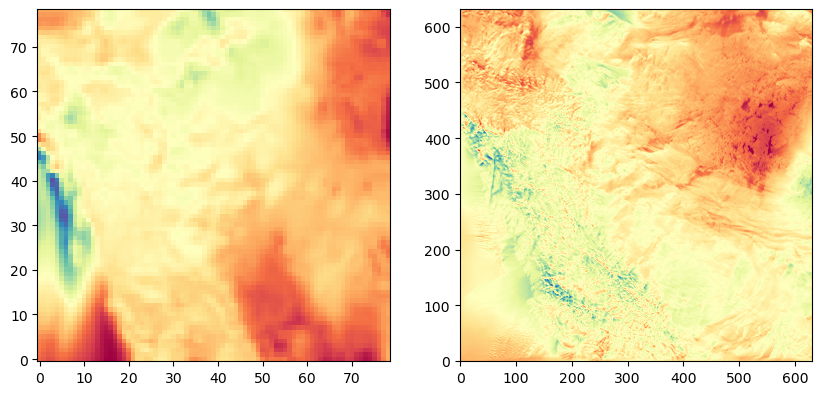

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
idx = torch.randint(0, lr.size(0), (1,)).item()
lrvar, hrvar = 1, 1
lrvmin, lrvmax = lr[idx, lrvar, ...].min(), lr[idx, lrvar, ...].max()
hrvmin, hrvmax = hr[idx, hrvar, ...].min(), hr[idx, hrvar, ...].max()

ax[0].imshow(lr[idx, lrvar, ...], origin="lower", cmap="Spectral", vmin=lrvmin, vmax=lrvmax)
ax[1].imshow(hr[idx, hrvar, ...], origin="lower", cmap="Spectral", vmin=lrvmin, vmax=lrvmax)